In [1]:

import pandas as pd
import numpy as np
from datetime import datetime

print("Librerías importadas correctamente.")

file_path = '04-25.csv'

Librerías importadas correctamente.


In [3]:
#Los datos provienen del sitio oficial de la Estación Astronómica Río Grande (EARG). Usé un archivo .csv del mes de abril de 2025,
#con datos climáticos diarios como:
#•	Temperatura (media, máxima, mínima)
#•	Ráfaga máxima de viento
#•	Presión atmosférica media
#•	Lluvia diaria
#•	Radiación solar
#•	Índice UV
#•	Fecha y horas asociadas a cada medición


In [5]:
try:
    # Paso 1.1: Cargar el CSV con la primera fila como encabezado y el delimitador correcto
    df_raw_data = pd.read_csv(file_path, sep=';', header=0)
    print(f"Dataset '{file_path}' cargado correctamente con encabezados.")

    # Stripping de los nombres de las columnas para evitar espacios ocultos
    df_raw_data.columns = df_raw_data.columns.str.strip()

    # Paso 1.2: Renombrar columnas para mayor claridad
    df_raw_data = df_raw_data.rename(columns={
        'AMD': 'Fecha_Str', # Esta columna contiene el string "Año Mes Dia"
        'temp mediaC': 'temp_media_C',
        'tempmaxC': 'temp_max_C',
        'H': 'hora_temp_max',
        'M': 'min_temp_max',
        'tempminC': 'temp_min_C',
        'H.1': 'hora_temp_min',
        'M.1': 'min_temp_min',
        'vientomediokm/h': 'velocidad_viento_kmh',
        'dir': 'direccion_viento',
        'rfgakm/h': 'rafaga_max_kmh',
        'dir.1': 'direccion_rafaga',
        'H.2': 'hora_rafaga_max',
        'M.2': 'min_rafaga_max',
        'pres.mediahPa': 'presion_media_hPa',
        'lluviadiariamm': 'lluvia_diaria_mm',
        'radmaxW/m2': 'radiacion_max_Wm2',
        'H.3': 'hora_rad_max',
        'M.3': 'min_rad_max',
        'Uvmaxindex': 'uv_max_index',
        'H.4': 'hora_uv_max',
        'M.4': 'min_uv_max'
    })
    
    # Imprimir los nombres de columnas después del renombrado para verificar
    print("\nNombres de columnas después del renombrado:")
    print(df_raw_data.columns)

    # Paso 1.3: Procesar la columna 'Fecha_Str' directamente a datetime
    # Usaremos pd.to_datetime con errors='coerce' para que los valores que no pueda tomarse se conviertan en NaT (Not a Time)
    # y luego eliminaremos esas filas, en lugar de intentar split y luego combinar.
    
    # Primero, asegúrate de que la columna 'Fecha_Str' no tenga NaNs o que sean manejados
    print("\nValores únicos en 'Fecha_Str' (primeros 20) y conteo de NaNs antes de procesar fecha:")
    print(df_raw_data['Fecha_Str'].value_counts(dropna=False).head(20)) # Para ver si hay valores extraños o NaNs
    print(f"NaNs en 'Fecha_Str' antes de procesar: {df_raw_data['Fecha_Str'].isnull().sum()}")

    # Convertir directamente a datetime. Pandas es inteligente y suele manejar "YYYY M D"
    df_raw_data['Fecha'] = pd.to_datetime(df_raw_data['Fecha_Str'], errors='coerce')

    # Eliminar las filas donde la conversión de fecha falló (resultó en NaT)
    df_raw_data.dropna(subset=['Fecha'], inplace=True)

    # Establecer 'Fecha' como el índice del DataFrame y ordenarlo cronológicamente
    df_raw_data = df_raw_data.set_index('Fecha').sort_index()

    # Eliminar la columna temporal 'Fecha_Str'
    df_raw_data = df_raw_data.drop(columns=['Fecha_Str'])


    # Paso 1.4: Limpiar y convertir a numérico el resto de las columnas
    cols_to_numeric = [
        'temp_media_C', 'temp_max_C', 'temp_min_C',
        'velocidad_viento_kmh', 'rafaga_max_kmh',
        'presion_media_hPa', 'lluvia_diaria_mm',
        'radiacion_max_Wm2', 'uv_max_index',
        'hora_temp_max', 'min_temp_max', 'hora_temp_min', 'min_temp_min',
        'hora_rafaga_max', 'min_rafaga_max', 'hora_rad_max', 'min_rad_max',
        'hora_uv_max', 'min_uv_max'
    ]

    for col in cols_to_numeric:
        if col in df_raw_data.columns:
            # Reemplazar comas por puntos y convertir a numérico
            df_raw_data[col] = df_raw_data[col].astype(str).str.replace(',', '.', regex=False)
            df_raw_data[col] = pd.to_numeric(df_raw_data[col], errors='coerce')
        else:
            print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame después del renombrado o eliminación.")


    # Mostrar la información del DataFrame después de las transformaciones
    print("\nDataFrame final después de todas las transformaciones:")
    print(df_raw_data.head())
    print("\nInformación del DataFrame final:")
    df_raw_data.info()
    print("\nConteo de valores nulos después de la conversión (incluyendo la columna 'dir' y 'dir.1'):")
    print(df_raw_data.isnull().sum())
    
    print("\nTipos de datos de las columnas numéricas clave después de la conversión:")
    print(df_raw_data[['velocidad_viento_kmh', 'temp_media_C', 'presion_media_hPa']].dtypes)


except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encontró. Asegúrate de que la ruta y el nombre del archivo sean correctos.")
except Exception as e:
    print(f"Error inesperado al cargar o procesar el archivo: {e}")



Dataset '04-25.csv' cargado correctamente con encabezados.

Nombres de columnas después del renombrado:
Index(['Fecha_Str', 'temp_media_C', 'temp_max_C', 'hora_temp_max',
       'min_temp_max', 'temp_min_C', 'hora_temp_min', 'min_temp_min',
       'velocidad_viento_kmh', 'direccion_viento', 'rafaga_max_kmh',
       'direccion_rafaga', 'hora_rafaga_max', 'min_rafaga_max',
       'presion_media_hPa', 'lluvia_diaria_mm', 'radiacion_max_Wm2',
       'hora_rad_max', 'min_rad_max', 'uv_max_index', 'hora_uv_max',
       'min_uv_max'],
      dtype='object')

Valores únicos en 'Fecha_Str' (primeros 20) y conteo de NaNs antes de procesar fecha:
Fecha_Str
2023  9 20    2
2023  9 22    2
2023  9 14    2
2023  9 15    2
2023  9 16    2
2023  9 17    2
2023  9 18    2
2023  9 19    2
2023  9 21    2
2023  9 23    2
2023  9 12    2
2023  9 24    2
2023  9 25    2
2023  9 26    2
2023  9 27    2
2023  9 28    2
2023  9 29    2
2023  9 30    2
2023  9 13    2
NaN           2
Name: count, dtype: int64
N

In [7]:
#•	A partir de la columna de fecha, creé nuevas columnas como día, mes, día de la semana y semana del año,
#para que el modelo entienda la dimensión temporal, como aprendimos al preparar los datos para modelos supervisados en la Clase 4.

In [9]:
# Paso 2.1: Visualizar distribución de 'lluvia_diaria_mm' para decidir imputación
print("\nEstadísticas descriptivas de 'lluvia_diaria_mm':")
print(df_raw_data['lluvia_diaria_mm'].describe())
print("\nConteo de valores no nulos en 'lluvia_diaria_mm':")
print(df_raw_data['lluvia_diaria_mm'].value_counts(dropna=False).head(10))

# Decision para 'lluvia_diaria_mm':
# Si la moda (valor más frecuente) es 0 y hay muchos 0s,
# es probable que los NaNs signifiquen ausencia de lluvia.
# Si hay una distribución más variada, la interpolación podría ser mejor.

# Dado que es lluvia, y a menudo muchos días no llueve,
# una estrategia común es asumir 0 si el valor es NaN,
# especialmente si el 0 es un valor frecuente. Si no, interpolar.
# Por ahora, vamos a usar interpolate para la mayoría, y luego podemos afinar.
# Un valor 0 para lluvia es una "no-lluvia", no necesariamente un dato perdido.
# Sin embargo, la interpolación lineal también es razonable para series temporales.
# Vamos con interpolación lineal para este paso, y si el resultado no es óptimo,
# podemos reevaluar y usar 0 o ffill/bfill.




Estadísticas descriptivas de 'lluvia_diaria_mm':
count    743.000000
mean       0.825034
std        1.946056
min        0.000000
25%        0.000000
50%        0.000000
75%        0.400000
max       13.200000
Name: lluvia_diaria_mm, dtype: float64

Conteo de valores no nulos en 'lluvia_diaria_mm':
lluvia_diaria_mm
0.0    435
NaN    199
0.2     95
0.4     31
0.6     21
1.0     15
0.8     15
2.0     14
1.2      8
1.6      7
Name: count, dtype: int64


In [11]:
# Paso 2.2: Imputar valores numéricos faltantes con interpolación lineal
# La interpolación es buena para series temporales ya que estima valores intermedios.
print("\nImputando valores faltantes con interpolación lineal...")
df_raw_data_imputed = df_raw_data.copy() # Crear una copia para no modificar el original directamente

# Aplicar interpolación solo a las columnas numéricas
for col in df_raw_data_imputed.select_dtypes(include=np.number).columns:
    df_raw_data_imputed[col] = df_raw_data_imputed[col].interpolate(method='linear', limit_direction='both')




Imputando valores faltantes con interpolación lineal...


In [13]:
# Paso 2.3: Imputar valores faltantes en las columnas categóricas (dirección) con la moda
# Aunque actualmente no tienen NaNs, es una buena práctica incluirlo para futuras modificaciones.
for col in df_raw_data_imputed.select_dtypes(include='object').columns:
    if df_raw_data_imputed[col].isnull().any():
        mode_val = df_raw_data_imputed[col].mode()[0]
        df_raw_data_imputed[col].fillna(mode_val, inplace=True)



In [15]:
# Paso 2.4: Verificar NaNs después de la imputación
print("\nConteo de valores nulos después de la imputación:")
print(df_raw_data_imputed.isnull().sum())

# Mostrar la información del DataFrame después de la imputación
print("\nInformación del DataFrame después de la imputación:")
df_raw_data_imputed.info()
print("\nPrimeras 5 filas del DataFrame después de la imputación:")
print(df_raw_data_imputed.head())

# Actualizar df_raw_data con el DataFrame imputado
df_raw_data = df_raw_data_imputed


Conteo de valores nulos después de la imputación:
temp_media_C            0
temp_max_C              0
hora_temp_max           0
min_temp_max            0
temp_min_C              0
hora_temp_min           0
min_temp_min            0
velocidad_viento_kmh    0
direccion_viento        0
rafaga_max_kmh          0
direccion_rafaga        0
hora_rafaga_max         0
min_rafaga_max          0
presion_media_hPa       0
lluvia_diaria_mm        0
radiacion_max_Wm2       0
hora_rad_max            0
min_rad_max             0
uv_max_index            0
hora_uv_max             0
min_uv_max              0
dtype: int64

Información del DataFrame después de la imputación:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2022-11-01 to 2025-04-30
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp_media_C          942 non-null    float64
 1   temp_max_C            942 non-null    float64
 2   hora

In [17]:
# Paso 3: 

# 3.1 Características Basadas en el Tiempo
df_processed = df_raw_data.copy() # Trabajaremos sobre la copia imputada

df_processed['year'] = df_processed.index.year
df_processed['month'] = df_processed.index.month
df_processed['day'] = df_processed.index.day
df_processed['dayofweek'] = df_processed.index.dayofweek # Lunes=0, Domingo=6
df_processed['dayofyear'] = df_processed.index.dayofyear
df_processed['weekofyear'] = df_processed.index.isocalendar().week.astype(int)




In [19]:
# 3.2 Valores Retrasados (Lag Features) para 'velocidad_viento_kmh'
#	También generé valores anteriores de la velocidad del viento, conocidos como valores desplazados o "lags", 
#como por ejemplo: el viento de ayer, hace 2 días, o hace una semana. 
#Esto lo usamos para capturar patrones como vimos en la preparación de datos de series temporales en la Clase 6.
lags = [1, 2, 3, 7, 14] # Velocidad del viento de ayer, anteayer, etc.
for lag in lags:
    df_processed[f'velocidad_viento_kmh_lag_{lag}'] = df_processed['velocidad_viento_kmh'].shift(lag)

# Después de los lags, puede haber NaNs al inicio. Los rellenaremos con la primera observación válida
# o con 0 si es más apropiado. Para los lags, la primera observación suele ser la mejor.
df_processed.bfill(inplace=True) # Rellenar hacia atrás con el siguiente valor válido



In [21]:
# 3.3 Medias Móviles (Rolling Mean Features) para 'velocidad_viento_kmh'
#•	Luego calculé promedios móviles de 3 y 7 días.
#Estas medias suavizan los valores y ayudan al modelo a detectar tendencias, un recurso que se explicó como útil en la Clase 8.
windows = [3, 7] # Media de los últimos 3 y 7 días
for window in windows:
    df_processed[f'velocidad_viento_kmh_rolling_mean_{window}'] = df_processed['velocidad_viento_kmh'].rolling(window=window).mean()

# Las medias móviles también generarán NaNs al inicio (primeros N-1 valores).
# Podemos rellenarlos con la primera media móvil calculada o con el valor original
# o incluso con la media de la columna.
df_processed.bfill(inplace=True) # Rellenar hacia atrás con el siguiente valor válido

print("\nDataFrame después del analisis esplratorio:")
print(df_processed.head())
print("\nInformación del DataFrame después del analisis esplratorio:")
df_processed.info()
print("\nConteo de valores nulos después del analisis esplratorio:")
print(df_processed.isnull().sum())

# Actualizar df_raw_data (o usar df_processed para los siguientes pasos)
df_raw_data = df_processed


DataFrame después del analisis esplratorio:
            temp_media_C  temp_max_C  hora_temp_max  min_temp_max  temp_min_C  \
Fecha                                                                           
2022-11-01           8.5        14.4           15.0          15.0         1.2   
2022-11-02          10.3        17.7           14.0          50.0        -1.3   
2022-11-03          11.5        19.4           16.0          55.0         3.3   
2022-11-04          14.2        17.0           15.0          30.0        11.5   
2022-11-05          14.4        23.6           12.0          40.0         7.6   

            hora_temp_min  min_temp_min  velocidad_viento_kmh  \
Fecha                                                           
2022-11-01            5.0           5.0                  33.0   
2022-11-02            4.0          30.0                  26.1   
2022-11-03            6.0          30.0                  23.0   
2022-11-04           23.0          10.0                  23.3 

In [23]:
# Paso 4: Codificación de Variables Categóricas y Preparación Final de Datos

print("\nRealizando Codificación de Variables Categóricas y División de Datos...")




Realizando Codificación de Variables Categóricas y División de Datos...


In [25]:
# 4.1 Codificación One-Hot para variables categóricas
# Identificar las columnas categóricas que aún son 'object'
categorical_cols = df_raw_data.select_dtypes(include='object').columns
#•	Finalmente, se aplico codificación con variables dummies (get_dummies) para convertir columnas como direccion_viento en columnas numéricas,
#como se recomienda en modelos supervisados.

# drop_first=True evita la multicolinealidad y reduce el número de columnas creadas
df_encoded = pd.get_dummies(df_raw_data, columns=categorical_cols, drop_first=True, dtype=int)

print("\nDataFrame después del One-Hot Encoding:")
print(df_encoded.head())
print("\nColumnas del DataFrame después del One-Hot Encoding:")
print(df_encoded.columns.tolist())
print("\nInformación del DataFrame después del One-Hot Encoding:")
df_encoded.info()





DataFrame después del One-Hot Encoding:
            temp_media_C  temp_max_C  hora_temp_max  min_temp_max  temp_min_C  \
Fecha                                                                           
2022-11-01           8.5        14.4           15.0          15.0         1.2   
2022-11-02          10.3        17.7           14.0          50.0        -1.3   
2022-11-03          11.5        19.4           16.0          55.0         3.3   
2022-11-04          14.2        17.0           15.0          30.0        11.5   
2022-11-05          14.4        23.6           12.0          40.0         7.6   

            hora_temp_min  min_temp_min  velocidad_viento_kmh  rafaga_max_kmh  \
Fecha                                                                           
2022-11-01            5.0           5.0                  33.0            72.4   
2022-11-02            4.0          30.0                  26.1            69.2   
2022-11-03            6.0          30.0                  23.0      

In [27]:
# 4.2 Definición de X (features) e y (target)
# "velocidad_viento_k"  es nuestra variable objetivo
target_column = 'velocidad_viento_kmh'
y = df_encoded[target_column]
X = df_encoded.drop(columns=[target_column])

print(f"\nDimensión de las características (X): {X.shape}")
print(f"Dimensión de la variable objetivo (y): {y.shape}")





Dimensión de las características (X): (942, 71)
Dimensión de la variable objetivo (y): (942,)


In [29]:
# 4.3 
# Para series temporales, dividimos por fecha, no aleatoriamente
#Dividí los datos en un 80% para entrenamiento y un 20% para prueba, respetando el orden temporal como aprendimos en la Clase 4.
#El modelo fue entrenado con todas las variables generadas en los pasos anteriores.

split_point = int(len(df_encoded) * 0.8) # Aproximadamente el 80% para entrenamiento

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

print(f"\nDatos de Entrenamiento: {len(X_train)} filas (desde {X_train.index.min().date()} hasta {X_train.index.max().date()})")
print(f"Datos de Prueba: {len(X_test)} filas (desde {X_test.index.min().date()} hasta {X_test.index.max().date()})")

print("\nPreparación de datos completada. Listos para el modelado.")


Datos de Entrenamiento: 753 filas (desde 2022-11-01 hasta 2024-10-23)
Datos de Prueba: 189 filas (desde 2024-10-24 hasta 2025-04-30)

Preparación de datos completada. Listos para el modelado.


In [31]:
# Paso 5: Entrenamiento y Evaluación del Modelo de Machine Learning

print("\nEntrenando y Evaluando el Modelo de Machine Learning...")

# Importar el modelo y las métricas
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns




Entrenando y Evaluando el Modelo de Machine Learning...


In [33]:
# 5.1 Inicializar y Entrenar el Modelo RandomForestRegressor
#El modelo que utilicé es un Random Forest Regressor,
#que pertenece a la categoría de algoritmos supervisados, como vimos en la Clase 4 y 6.
#Elegí este modelo porque maneja muy bien múltiples variables numéricas y categóricas, y no necesita normalización previa.
#Es ideal para datos del mundo real con ruido y correlaciones internas.

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 usa todos los núcleos de CPU
print("\nIniciando entrenamiento del Random Forest Regressor...")
model.fit(X_train, y_train)
print("Entrenamiento completado.")




Iniciando entrenamiento del Random Forest Regressor...
Entrenamiento completado.


In [35]:
# 5.2 Realizar Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
print("\nPredicciones generadas en el conjunto de prueba.")




Predicciones generadas en el conjunto de prueba.


In [37]:
# 5.3 Evaluar el Modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calcular RMSE a partir de MSE
r2 = r2_score(y_test, y_pred)

print("\n--- Métricas de Evaluación del Modelo ---")
print(f"Error Absoluto Medio (MAE): {mae:.3f} km/h") #Error absoluto medio
print(f"Error Cuadrático Medio (MSE): {mse:.3f} (km/h)^2")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.3f} km/h") #Raiz del error cuadratico medio
print(f"Coeficiente de Determinación (R^2): {r2:.3f}") #•	R²: 0.855, lo que significa que el modelo explica el 85.55% de la variabilidad del viento





--- Métricas de Evaluación del Modelo ---
Error Absoluto Medio (MAE): 2.403 km/h
Error Cuadrático Medio (MSE): 9.720 (km/h)^2
Raíz del Error Cuadrático Medio (RMSE): 3.118 km/h
Coeficiente de Determinación (R^2): 0.864


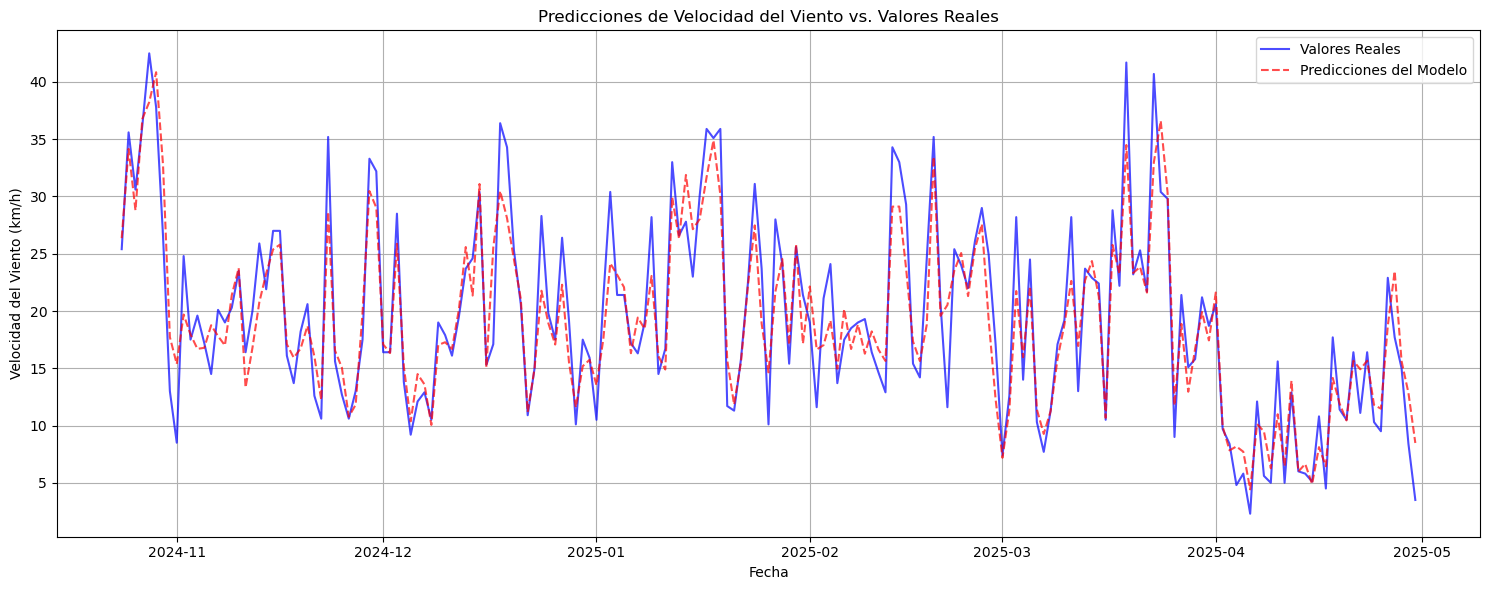

In [39]:
# 5.4 También generé un gráfico de predicción vs. valores reales,
#donde se observa que las líneas se siguen de cerca, lo cual indica que el modelo está generalizando bien.
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicciones del Modelo', color='red', linestyle='--', alpha=0.7)
plt.title('Predicciones de Velocidad del Viento vs. Valores Reales')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del Viento (km/h)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



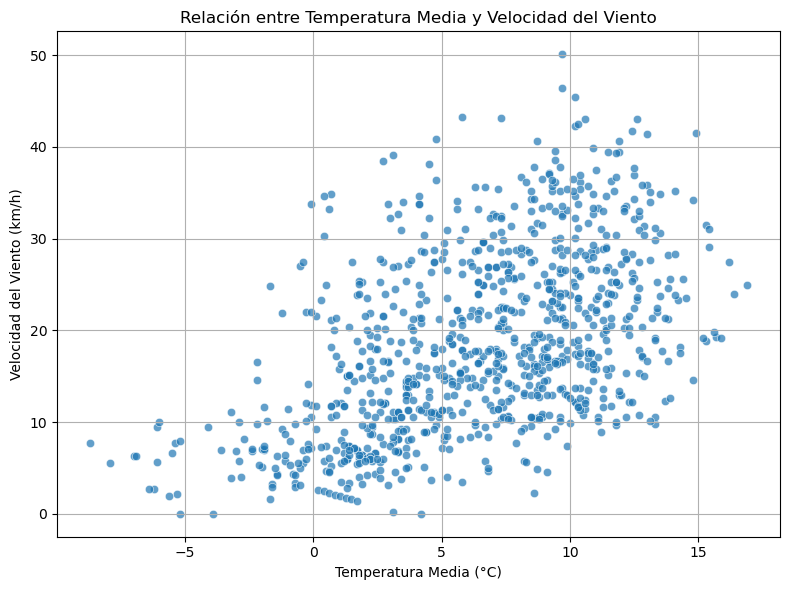

In [41]:
# Gráfico de dispersión – Temperatura media vs. velocidad del viento

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_raw_data, x='temp_media_C', y='velocidad_viento_kmh', alpha=0.7)
plt.title('Relación entre Temperatura Media y Velocidad del Viento')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Velocidad del Viento (km/h)')
plt.grid(True)
plt.tight_layout()
plt.show()

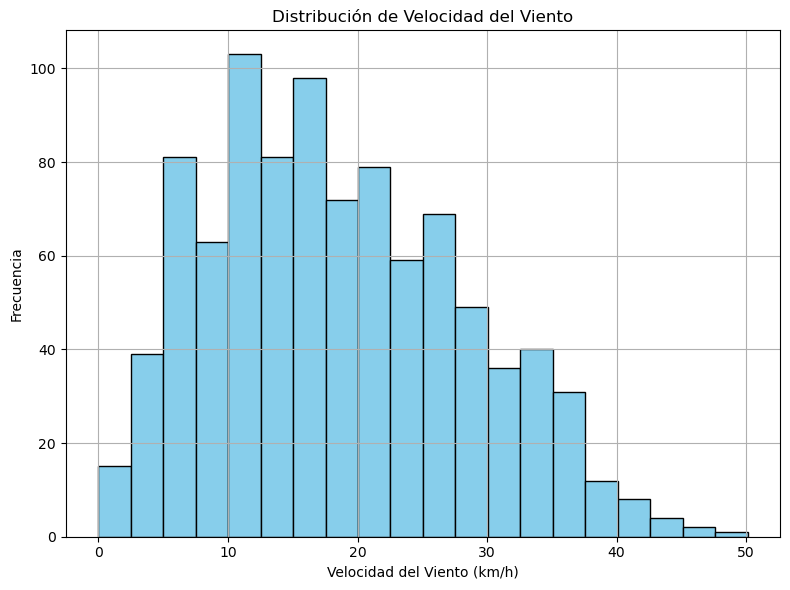

In [43]:
#Histograma de distribucion de velocidad del viento
plt.figure(figsize=(8, 6))
plt.hist(df_raw_data['velocidad_viento_kmh'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Velocidad del Viento')
plt.xlabel('Velocidad del Viento (km/h)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

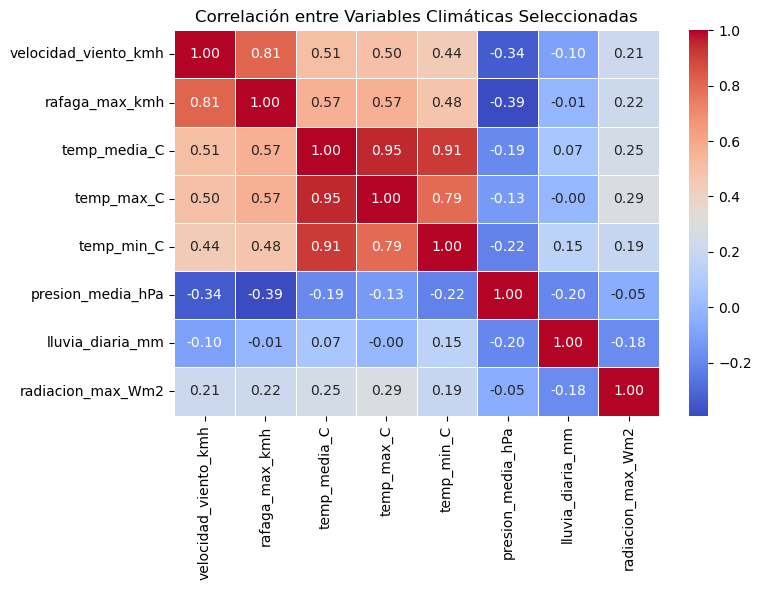

In [45]:
#Mapa de calor de correlaciones – Entre variables climáticas
variables_clave = [
    'velocidad_viento_kmh', 'rafaga_max_kmh',
    'temp_media_C', 'temp_max_C', 'temp_min_C',
    'presion_media_hPa', 'lluvia_diaria_mm', 'radiacion_max_Wm2'
]

# Calcular correlaciones
correlaciones = df_raw_data[variables_clave].corr()

# Graficar heatmap más legible
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre Variables Climáticas Seleccionadas')
plt.tight_layout()
plt.show()